<center><img src="http://www.ozyegin.edu.tr/sites/default/files/upload/Basin/ou_logo_tr.jpg"></center>

<center><h1>Predictive Analytics (IE 529)</h1></center>
<center><h2>Tutorial 1 (Working with Time Stamped Data)</h2></center>
<center><h4>(I would like to thank Prof. Marcel Scharth for an earlier version of this tutorial.)</h4></center>
<br>


This guide explains the basics of working with dates and times in Python and pandas. 

<a class="buttom" href="#Dates-and-Time-in-Python">Dates and Time in Python</a> <br>
<a class="buttom" href="#Conversions-between-strings-and-datetime">Conversions between strings and datetime</a> <br>
<a class="buttom" href="#Date-functionality-in-pandas">Date functionality in pandas</a> <br>
<a class="buttom" href="#Periods">Periods</a> <br>
<a class="buttom" href="#Reading-time-stamped-data">Reading time stamped data</a> <br>
<a class="buttom" href="#Time-series-subsetting">Time series subsetting</a> <br>
<a class="buttom" href="#Time-series-plot">Time series plot</a> <br>

This notebook assumes the following imports and settings.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook') 
sns.set_style('ticks')

##Dates and Time in Python

The [datetime](https://docs.python.org/3/library/datetime.html?highlight=datetime#module-datetime) module from the standard Python library provides the basic variable types and tools for date and time data. To get started, we retrieve the current date and time. 

In [2]:
from datetime import datetime
now=datetime.now()
now

datetime.datetime(2020, 12, 10, 15, 30, 8, 831710)

In [3]:
print(now)

2020-12-10 15:30:08.831710


The <TT>now</TT> variable that we created has a special data type which stores date and time down to microseconds.

In [4]:
type(now)

datetime.datetime

In [5]:
now.year, now.month, now.day

(2020, 12, 10)

An interesting feature of <TT>datetime</TT> objects is that we can perform operations with them.

In [6]:
delta=datetime(2020, 9, 15)-datetime(2019, 9, 12, 6, 10)
delta

datetime.timedelta(days=368, seconds=64200)

In [7]:
delta.days, delta.seconds

(368, 64200)

Fow example, if we want to shift a date 5 days ahead, we can use:

In [33]:
from datetime import timedelta
start=datetime(2020, 10, 1)
start+timedelta(50)

datetime.datetime(2020, 11, 20, 0, 0)

As a note, the <TT>datetime</TT> module also has separate <TT>date</TT>  and <TT>time</TT> objects. 

##Conversions between strings and datetime

Datetime objects (and the pandas counterparts) have the <TT>strftime</TT> method, which allows us to convert them to a string according to our desired format. Refer to this [page](http://strftime.org/) for the available formatting options. 

In [10]:
stamp=datetime(2020,10,1)
stamp.strftime('%Y-%m-%d')

'2020-10-01'

In [11]:
stamp.strftime('%d/%b/%y')

'01/Oct/20'

To convert strings to <TT>datatime</TT>, we can use the <TT>parse</TT> function, which infers almost any intelligible date format. Here is an example. 

In [12]:
from dateutil.parser import parse
parse('Sept 15th 2020')

datetime.datetime(2020, 9, 15, 0, 0)

We just need to be careful with the fact that it assumes a US date format, unless we specify otherwise. 

In [13]:
print(parse('1/10/2020'))
print(parse('1/10/2020', dayfirst=True))

2020-01-10 00:00:00
2020-10-01 00:00:00


##Date functionality in pandas

When dealing with multiple dates, we turn to pandas. 

In [14]:
dts=['10/10/2020','11/10/2020']
dates=pd.to_datetime(dts, dayfirst=True)
dates

DatetimeIndex(['2020-10-10', '2020-10-11'], dtype='datetime64[ns]', freq=None)

In pandas, a set of dates has the <TT>DatetimeIndex</TT> type. Each element of a <TT>DatetimeIndex</TT> has the <TT>TimeStamp</TT>, which for practical purposes is equivalent to <TT>datetime</TT>; we can use the two interchangeably. 

In [15]:
dates[0]

Timestamp('2020-10-10 00:00:00')

The pandas <TT>[date_range](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html)</TT> function allows us to generate a range of dates according to a specified frequency. 

In [16]:
dates=pd.date_range('24/Apr/2019', '29/Apr/2019')
print(dates)

DatetimeIndex(['2019-04-24', '2019-04-25', '2019-04-26', '2019-04-27',
               '2019-04-28', '2019-04-29'],
              dtype='datetime64[ns]', freq='D')


To set the frequency, we can set the <TT>date</TT> option. For example, for a business daily frequency:

In [17]:
dates=pd.date_range(start='24/Apr/2019', periods=5, freq='B')
print(dates)

DatetimeIndex(['2019-04-24', '2019-04-25', '2019-04-26', '2019-04-29',
               '2019-04-30'],
              dtype='datetime64[ns]', freq='B')


Monthly frequency:

In [18]:
dates=pd.date_range(start='24/Apr/2019', periods=5, freq='M')
print(dates)

DatetimeIndex(['2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
               '2019-08-31'],
              dtype='datetime64[ns]', freq='M')


The frequency option also accepts multiples:

In [19]:
dates=pd.date_range(start='24/Apr/2019', periods=5, freq='3M')
print(dates)

DatetimeIndex(['2019-04-30', '2019-07-31', '2019-10-31', '2020-01-31',
               '2020-04-30'],
              dtype='datetime64[ns]', freq='3M')


Refer to the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) for a list of available frequencies. 

##Periods

A related object is the <TT>Period</TT>, which represents a timespan like months and quarters, rather a point in time as in <TT>TimeStamp</TT>. For example, the variable below represents the period between 1/04/2019 and 30/04/2019. 

In [20]:
month=pd.Period('Apr-2019', freq='M')
month

Period('2019-04', 'M')

As with <TT>datetime</TT> and <TT>TimeStamp</TT> objects, we can perform operations with a <TT>Period</TT> object.  

In [21]:
month+1 # from above

Period('2019-05', 'M')

The counterpart of the <TT>DatetimeIndex</TT> is the <TT>PeriodIndex</TT>.

In [22]:
values=['2019Q1', '2019Q2', '2019Q3', '2019Q4']
index=pd.PeriodIndex(values, freq='Q')
index

PeriodIndex(['2019Q1', '2019Q2', '2019Q3', '2019Q4'], dtype='period[Q-DEC]', freq='Q-DEC')

To generate a period range:

In [23]:
pd.period_range('2019Q1','2020Q4', freq='Q')

PeriodIndex(['2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2',
             '2020Q3', '2020Q4'],
            dtype='period[Q-DEC]', freq='Q-DEC')

Finally, we can convert timestamps to periods as follows. 

In [24]:
dates=pd.date_range(start='24/Apr/2019', periods=5, freq='M')
print(dates)
dates.to_period()

DatetimeIndex(['2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
               '2019-08-31'],
              dtype='datetime64[ns]', freq='M')


PeriodIndex(['2019-04', '2019-05', '2019-06', '2019-07', '2019-08'], dtype='period[M]', freq='M')

##Reading time stamped data

Let us now work with data. For simplicity, our data will have only one column apart from the date. The same principles applies for working with data frames instead of a single series. 

The <TT>nswretail.csv</TT> file (available at LMS) contains monthly retail turnover figures for the state of NSW state of Australia. The retail turnover is defined as: 

<blockquote>
Retail sales; wholesale sales; takings from repairs, meals and hiring of goods (except for rent, leasing and hiring of land and buildings);
commissions from agency activity (e.g. commissions received from collecting dry cleaning, selling lottery tickets, etc.); and
the goods and services tax.
</blockquote>

To read the data, we follow the usual procedure. If you open the data file in a text editor, you will see that it has two columns: <TT>Month</TT> and <TT>Turnover</TT>. In a time series context, we want to make the date the index of the <TT>DataFrame</TT> by specifying <TT>Month</TT> as the index via the <TT>index_col</TT> option. We set the <TT>parse_dates</TT> options as <TT>True</TT> so that pandas can automatically recognise the dates column and convert them to <TT>TimeStamp</TT> objects. 

In [25]:
ts=pd.read_csv('nswretail.csv', index_col='Month', parse_dates=True)
ts.tail() # tail gives the last 5 observations in the data

,Turnover
Month,
2018-10-01,8747.3
2018-11-01,9245.0
2018-12-01,11085.5
2019-01-01,8651.0
2019-02-01,7717.4


In [26]:
ts.index

DatetimeIndex(['1982-04-01', '1982-05-01', '1982-06-01', '1982-07-01',
               '1982-08-01', '1982-09-01', '1982-10-01', '1982-11-01',
               '1982-12-01', '1983-01-01',
               ...
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01'],
              dtype='datetime64[ns]', name='Month', length=443, freq=None)

We can see that pandas converted (say) "Jun-2017" in the text file to a full date, which by default is the first day of the month. Since we know these figures refer to the whole month, we want to convert the indexes from timestamps to periods:

In [27]:
ts.index=ts.index.to_period()
ts.tail()

,Turnover
Month,
2018-10,8747.3
2018-11,9245.0
2018-12,11085.5
2019-01,8651.0
2019-02,7717.4


##Subsetting a time series

Selecting part of the time series works in an intuitive way.

In [28]:
ts['Feb-2017':'Jun-2017']

,Turnover
Month,
2017-02,7298.9
2017-03,8085.8
2017-04,7883.7
2017-05,8132.0
2017-06,8130.1


In [29]:
ts['2017Q2']

,Turnover
Month,
2017-04,7883.7
2017-05,8132.0
2017-06,8130.1


In [30]:
ts['Feb2018':]

,Turnover
Month,
2018-02,7527.1
2018-03,8436.2
2018-04,8041.3
2018-05,8438.3
2018-06,8354.4
2018-07,8304.6
2018-08,8474.8
2018-09,8387.7
2018-10,8747.3


##Time series plot

Once we load the time series, the beginning of our analysis will always be to visualise the data. The simplest way to plot a time series is to use the pandas as follows. 

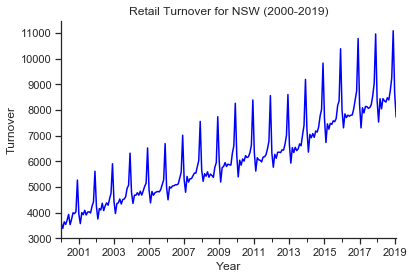

In [31]:
fig, ax = plt.subplots()
ts['Jan2000':]['Turnover'].plot(color='blue')
ax.set_xlabel('Year')
ax.set_ylabel('Turnover')
ax.set_title('Retail Turnover for NSW (2000-2019)')
sns.despine()
plt.show()

Using standard fuctions for plotting runs into problems with the horizontal axis labels, which Matplotlib will not recognise. If we want a customised plot, we would need to set the labels manually as below. 

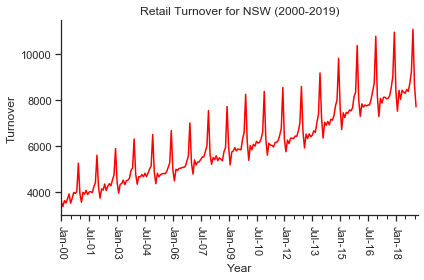

In [32]:
ts_sub=ts['Jan2000':]
fig, ax = plt.subplots()
ax.plot(ts_sub['Turnover'].values, color='red')

ax.set_xlim(0, len(ts_sub))

indexes = np.arange(0, len(ts_sub), 18) # we will place ticks every 18 months, starting with the first observation 
ax.set_xticks(indexes)
ax.set_xticklabels([ts_sub.index[i].strftime('%b-%y') for i in indexes], rotation='-90')

indexes = np.arange(0, len(ts_sub), 6) # minor ticks
ax.set_xticks(indexes, minor=True)

ax.set_xlabel('Year')
ax.set_ylabel('Turnover')
ax.set_title('Retail Turnover for NSW (2000-2019)')

plt.tight_layout()

sns.despine()
plt.show()